#Implementation of SVM Algorithm

###Step-1: Data Pre-Processing

In [31]:

#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
os.chdir("/content/drive/MyDrive/Datasets")

In [ ]:
#Reading Dataset
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Considering only SepalLength and SepalWidth
X=df.iloc[:,1:3].values

In [ ]:
df["Target"]=df["Species"].replace("Iris-setosa",0).replace("Iris-versicolor",1).replace("Iris-virginica",2)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [ ]:
y=df["Target"].values

###Step-2: Fitting the SVM algorithm to the training set.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [ ]:
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1).fit(x_train, y_train)

###Step-3: Predicting the test result

In [ ]:
y_pred = svc.predict(x_test)

###Step-4: Test Accuracy of the result

In [ ]:
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy:", accuracy)

Accuracy: 80.0


In [ ]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[16  0  0]
 [ 0 13  5]
 [ 0  4  7]]


###Step-5: Visualizing the test set result

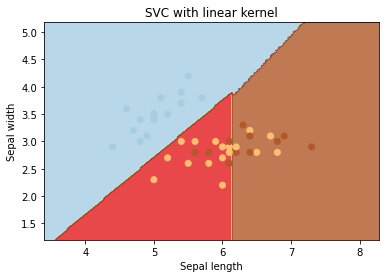

In [ ]:
# create a mesh to plot
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_test_min, y_test_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_test_min, y_test_max, h))

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()